**STEP:1** For the heart disease prediction project, I began by installing essential libraries and frameworks necessary for deep learning in Python. These included TensorFlow and Keras for building and training neural networks, as well as libraries like NumPy and Pandas for efficient data manipulation and preprocessing. Scikit-learn was instrumental for data splitting, feature scaling, and model evaluation. Matplotlib and Seaborn were used for visualizing data distributions and model performance metrics. The dataset used contained a variety of clinical parameters and medical history attributes, crucial for training a predictive model. The deep learning architecture employed involved sequential layers of dense and dropout layers to mitigate overfitting, with activation functions like ReLU for hidden layers and sigmoid for output layers to predict the probability of heart disease. After training the model on labeled data, I evaluated its performance using metrics such as accuracy, precision, recall, and F1-score, ensuring robustness and reliability in predicting heart disease outcomes

In [1]:
%pip install tensorflow
#%python -m pip install --upgrade pip

In [2]:
%pip install pandas
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Step:2** These imports cover essential functionalities such as data handling with NumPy and Pandas, data splitting with train_test_split from Scikit-learn, feature scaling with StandardScaler, and deep learning capabilities through TensorFlow.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as s
import statsmodels.api as sm

**STEP:2**I read the heart disease dataset using Pandas, stored in a DataFrame named heart_data.

In [4]:
df=pd.read_csv('heart_disease.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.shape

(299, 13)

**Step:4** The heart disease dataset contains a total of 14 attributes, including both clinical and demographic features such as age, sex, cholesterol levels, and various electrocardiographic measurements. The target variable indicates the presence or absence of heart disease, classified into binary outcomes. Each instance in the dataset represents a patient, providing a comprehensive set of factors that may influence heart health. 

In [7]:
describe=df.describe()
describe.T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


**Filling mising value**To address missing values in the heart disease dataset,

In [8]:
columns_to_fill = ['age', 'anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time','DEATH_EVENT']
# Replace missing values in the specified columns with the average of each respective column
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())
# Display the DataFrame after filling missing values
print("DataFrame after filling missing values with the average of the specified columns:")
print(df)

DataFrame after filling missing values with the average of the specified columns:
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 

**step:4: Scaling** Scaling values is crucial to ensure that features with different ranges or units contribute equally to model training. In the heart disease dataset, I used StandardScaler from Scikit-learn to standardize numerical features such as age, cholesterol levels, and blood pressure.

In [9]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(df)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled)

          age   anaemia  creatinine_phosphokinase  diabetes  \
0    1.192945 -0.871105                  0.000166 -0.847579   
1   -0.491279 -0.871105                  7.514640 -0.847579   
2    0.350833 -0.871105                 -0.449939 -0.847579   
3   -0.912335  1.147968                 -0.486071 -0.847579   
4    0.350833  1.147968                 -0.435486  1.179830   
..        ...       ...                       ...       ...   
294  0.098199 -0.871105                 -0.537688  1.179830   
295 -0.491279 -0.871105                  1.278215 -0.847579   
296 -1.333392 -0.871105                  1.525979  1.179830   
297 -1.333392 -0.871105                  1.890398 -0.847579   
298 -0.912335 -0.871105                 -0.398321 -0.847579   

     ejection_fraction  high_blood_pressure     platelets  serum_creatinine  \
0            -1.530560             1.359272  1.681648e-02          0.490057   
1            -0.007077            -0.735688  7.535660e-09         -0.284552   
2     

In [10]:
X=df[ ['age', 'anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time',]]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [11]:
y=df[['DEATH_EVENT']]
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


**Step:5 Applying Classifier** The KNeighborsClassifier is a simple yet effective classification algorithm in machine learning. It belongs to the family of instance-based or lazy learning algorithms where it memorizes the entire training dataset during training. Here are five key points about KNeighborsClassifier

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knn=neigh.fit(X_train, y_train)
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6333333333333333

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=4)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7555555555555555


c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

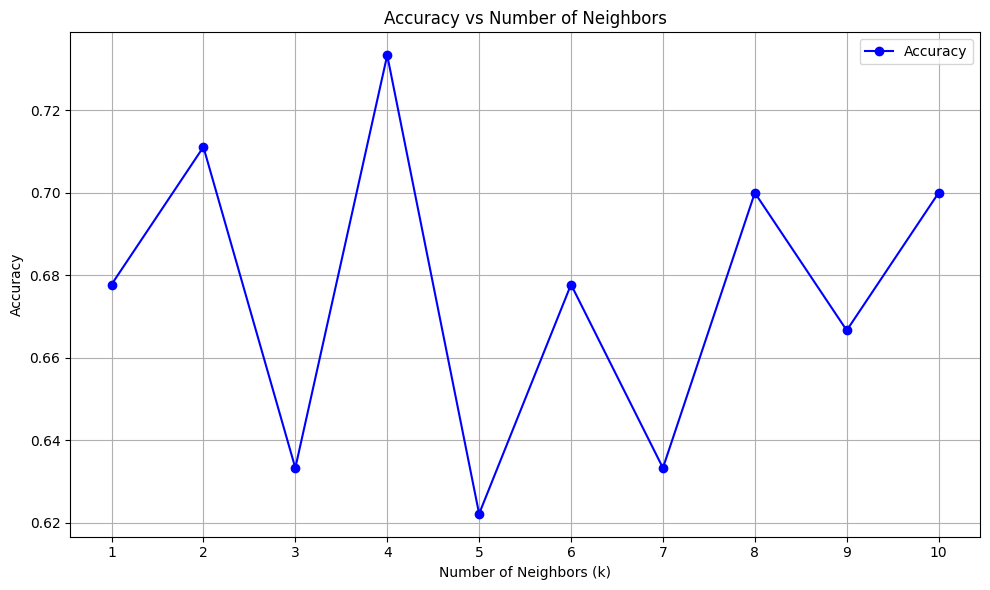

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
# Varying number of neighbors
neighbors = range(1, 11)  # Change range as needed
accuracy_scores = []
for k in neighbors:
    # Creating KNN classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    knn = neigh.fit(X_train, y_train)
    # Predicting on the test set
    y_pred = knn.predict(X_test)
    # Calculating accuracy and storing the score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

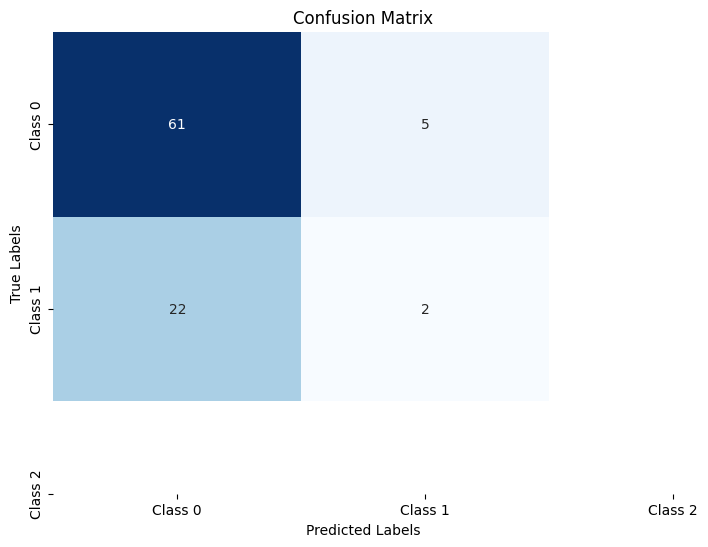

In [16]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Step6:Classification Report:**

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8166666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60

Confusion Matrix:
[[34  1]
 [10 15]]
Optimization terminated successfully.
         Current function value: 0.326373
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  239
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                           12
Date:                Sun, 11 Jan 2026   Pseudo R-squ.:                  0.4635
Time:                        12:12:27   Log-Likelihood:                -78.003
converge

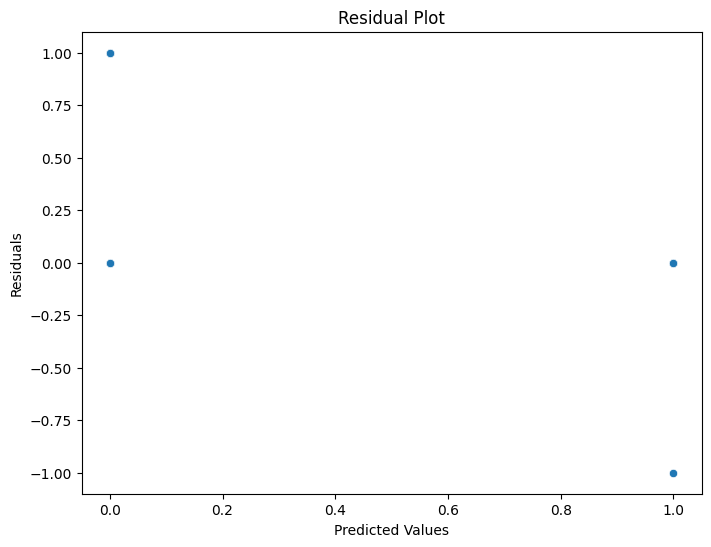

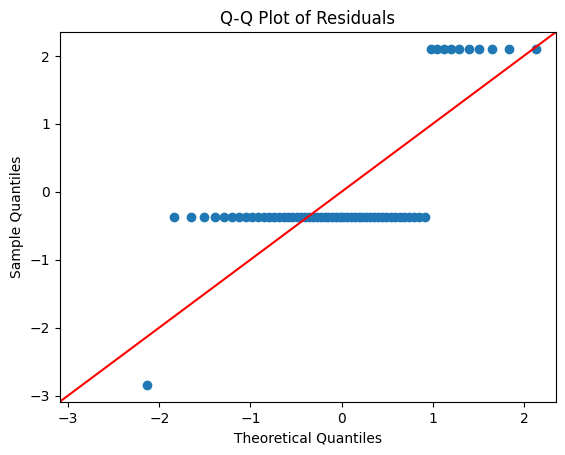

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your dataset
# Extract features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train your model (replace LogisticRegression with your specific model)
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Quality and Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_result}')
print(f'Confusion Matrix:\n{confusion_matrix_result}')
# Variable Significance (for Logistic Regression)
X_train_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_const).fit()
# Get the summary of the logistic regression model
print(logit_model.summary())
# Residual Analysis (for Logistic Regression)
residuals = y_test - y_pred
# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
# Normality of Residuals (Q-Q Plot)
residuals_normalized = (residuals - residuals.mean()) / residuals.std()
sm.qqplot(residuals_normalized, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

**Naive_bayes**Naive Bayes algorithm is a probabilistic classifier based on Bayes' theorem. It assumes independence among predictors (features) for simplicity.Calculate prior probabilities for each class based on training data.Assume features are conditionally independent given the class.

In [18]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred=logmodel.predict(X_test)
y_pred
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[37,  3],
       [ 8, 12]])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8166666666666667

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


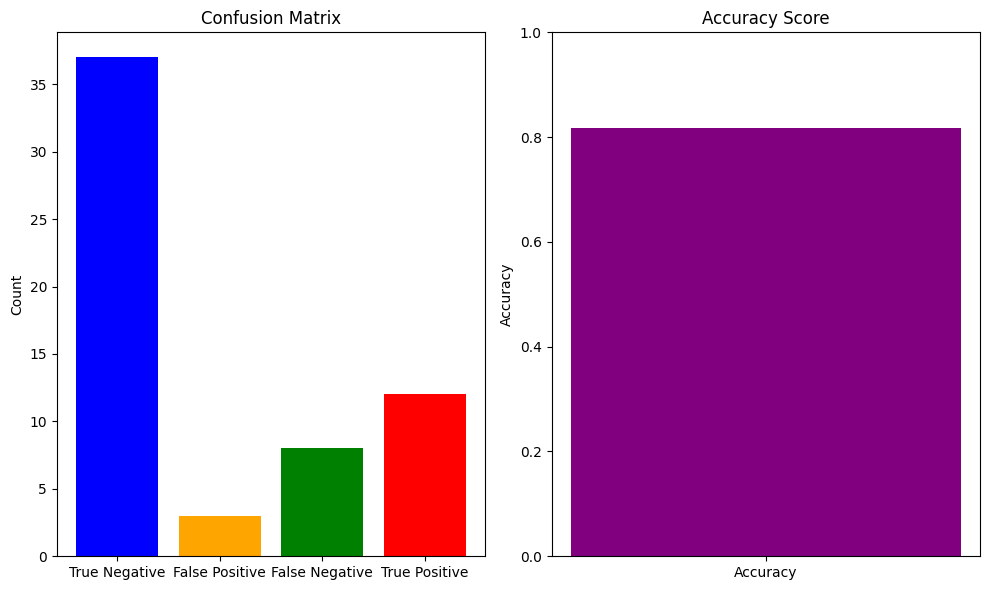

In [20]:
# Fit logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
# Predict on test set
y_pred = logmodel.predict(X_test)
# Calculate confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Plotting the results
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
plt.figure(figsize=(10, 6))
# Confusion Matrix
plt.subplot(1, 2, 1)
plt.bar(labels, cm.flatten(), color=['blue', 'orange', 'green', 'red'])
plt.title('Confusion Matrix')
plt.ylabel('Count')
# Accuracy Score
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='purple')
plt.title('Accuracy Score')
plt.ylim(0, 1)  # Setting y-axis limit to 0-1 for accuracy score
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

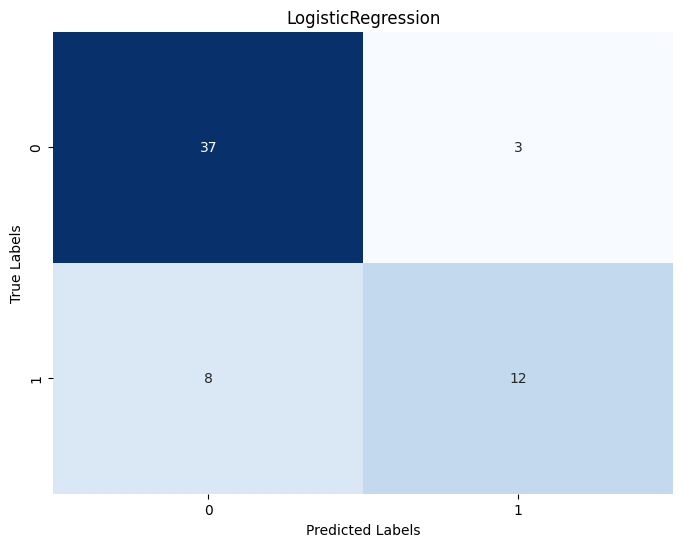

Accuracy: 0.82


In [21]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(f'Accuracy: {accuracy:.2f}')

**GaussianNB**Gaussian Naive Bayes is a probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features. It is particularly useful when dealing with continuous data, assuming that features follow a Gaussian distribution. In practice, GaussianNB is often used for classification tasks where the assumption of feature independence holds reasonably well.

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb.fit(X_train,y_train)
y_pred=classifier_nb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7833333333333333

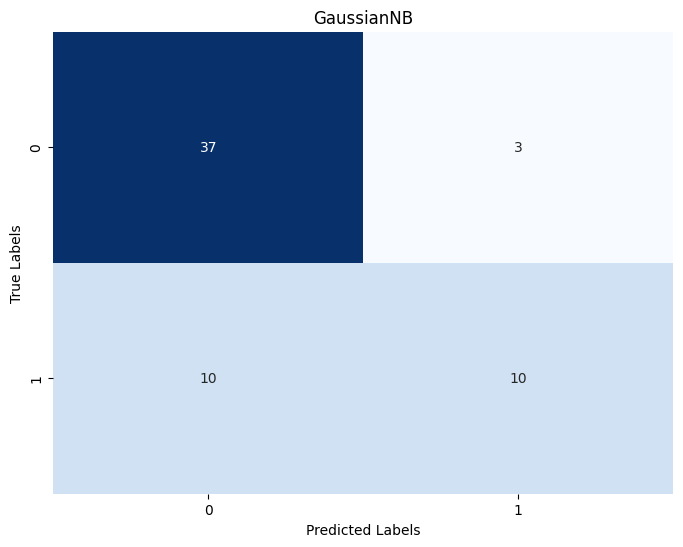

Accuracy: 0.78


In [23]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('GaussianNB')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(f'Accuracy: {accuracy:.2f}')

**make sure that the variables have the correct type**

In [24]:
df = pd.DataFrame(df)
# Check if 'gender' column exists in the DataFrame
if 'gender' in df.columns:
    # Convert 'gender' to categorical type
    df['gender'] = df['gender'].astype('category')
else:
    print("Column 'gender' not found in the DataFrame.")
# Check current data types after conversion
print(df.dtypes)

Column 'gender' not found in the DataFrame.
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [26]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(52, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 52)             │         6,708 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,718 (420.77 KB)

 Trainable params: 107,718 (420.77 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential([
    Flatten(input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(52, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 52)             │         6,708 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            53 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,425 (32.91 KB)

 Trainable params: 8,425 (32.91 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split    #y=df[['DEATH_EVENT']]
y.head()
from sklearn.preprocessing import StandardScaler
# Assuming your DataFrame is named df
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']  # Replace 'target' with your actual target column name
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (for binary classification)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
import numpy as np
# Convert y_train to a NumPy array
y_train = np.array(y_train)

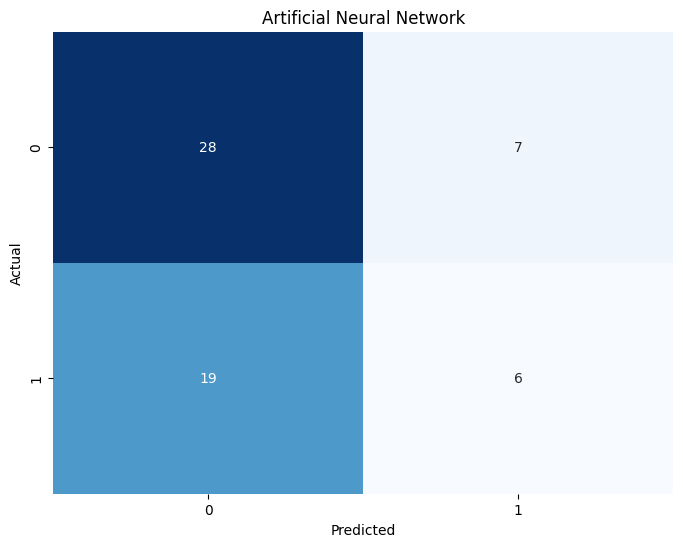

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Artificial Neural Network')
plt.show()

In [33]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.6754 - loss: 0.6498 - val_accuracy: 0.7708 - val_loss: 0.6324
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7592 - loss: 0.5989 - val_accuracy: 0.7917 - val_loss: 0.5946
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7592 - loss: 0.5541 - val_accuracy: 0.7917 - val_loss: 0.5708
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7592 - loss: 0.5253 - val_accuracy: 0.7917 - val_loss: 0.5532
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7749 - loss: 0.4945 - val_accuracy: 0.7917 - val_loss: 0.5391
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7906 - loss: 0.4674 - val_accuracy: 0.7917 - val_loss: 0.5270
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8063 - loss: 0.4415 - val_accuracy: 0.7708 - val_loss: 0.5165
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8272 - loss: 0.4168 - val_accuracy: 0.7500 - val_loss: 0.507

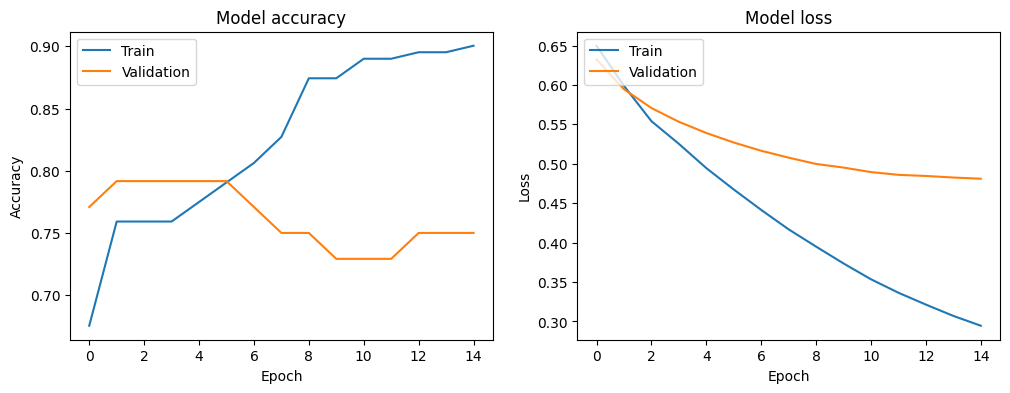

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()